In [9]:
import cv2
import numpy as np
from PIL import Image, ImageEnhance

In [2]:
# Use readNet to load Yolo
net=cv2.dnn.readNet("./yolov3.weights", "./yolov3.cfg")
 
# Classes
Classes = []
with open("coco.names","r") as f:
	classes = [line.strip() for line in f.readlines()]
 
# Define Output Layers	
layer_names  =net.getLayerNames()
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]

In [3]:
print(cv2.__version__)

4.5.3


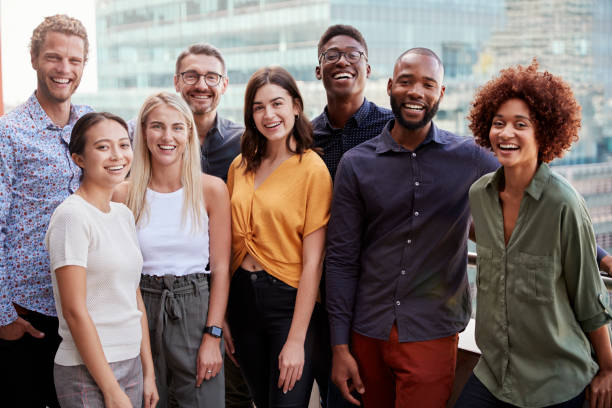

In [46]:
file_path="/Users/a0p07yx/Documents/Projects/QueueLength/8people.jpeg"
image = Image.open(file_path)
image

In [47]:
width, height = image.size

In [48]:
img = np.asarray(image)
#reshape, normalize and re-order colors of image using blob
blob = cv2.dnn.blobFromImage(img,1/255,(416,416),(0,0,0),True,crop=False)
 
# blob as input
net.setInput(blob)
 
#Object Detection
results = net.forward(output_layers)

In [49]:
# Evaluate class ids, confidence score and bounding boxes for detected objects
class_ids=[]
confidences=[]
boxes=[]
confidence_threshold = 0.5
COLORS=[] 
for result in results:
    for detection in result:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence> confidence_threshold:
            # Object Detected
            center_x=int(detection[0]*width)
            center_y=int(detection[1]*height)
            w=int(detection[2]*width)
            h=int(detection[3]*height)
            # Boundry box Co-ordinates
            x=int(center_x-w/2)
            y=int(center_y-h/2)
            color = np.random.randint(0, 255, size=(3, ))

            #convert data types int64 to int
            color = ( int (color [ 0 ]), int (color [ 1 ]), int (color [ 2 ])) 
            COLORS.append(color)
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [54]:
# Non-max Suppression
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.4, 0.6)
 
# Draw final bounding boxes
font = cv2.FONT_HERSHEY_PLAIN
count = 0
for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = str(classes[class_ids[i]])
        color = COLORS[i]
        cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
        cv2.putText(img, label, (x, y-5), font, 1, color, 1)
        if label == 'person':
            count= count+1
cv2.putText(img, str(count), (5, 5), font, 1, color, 1)
print('total number of person in image:',count)

total number of person in image: 9


In [51]:
cv2.imshow("Detected_Images",img)

In [52]:
PIL_image = Image.fromarray(np.uint8(img)).convert('RGB')

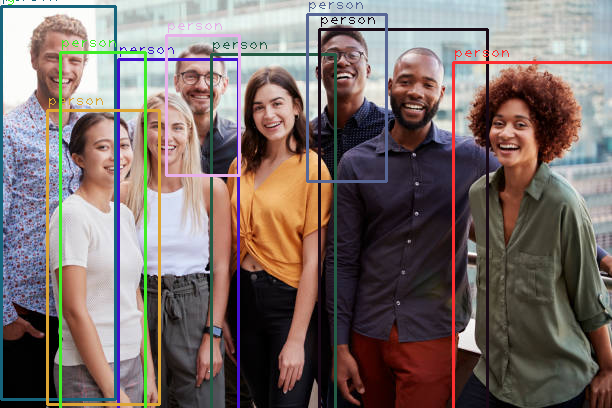

In [53]:
PIL_image

In [ ]:
https://www.codeproject.com/Articles/5283661/AI-Queue-Length-Detection-Object-Detection-in-Imag

In [ ]:
https://www.visiongeek.io/2018/07/yolo-object-detection-opencv-python.html